# Processing with fixed window

> Ricardo Peres, 14.12.2023


### Intro

When taking LED data often the analysis can be simplyfied by skiping peak finding and using a fixed integration window. This is particularly useful for systematic LED calibration.


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pylars

/home/atp/rperes/software/PyLArS/pylars/processing/rawprocessor.py:5: TqdmExperimentalWarning: Using `tqdm.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm import tqdm




### Single dataset analysis

We'll start by looking into a single LED dataset, defining an integration window and computing all the properties from all the available channels.

In [3]:
run_path = '/disk/gfs_atp/xenoscope/tpc/commissioning/pressure_studies/LED_levels/'
data_path = run_path + '/100ns_3_0V/100ns_3_0V_Module_0_0.root'

Loading raw data from /disk/gfs_atp/xenoscope/tpc/commissioning/pressure_studies/LED_levels//100ns_3_0V/100ns_3_0V_Module_0_0.root


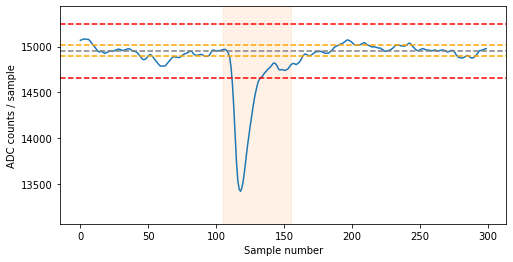

In [4]:
## SImply plot a waveform with the led window highlighted

fig, ax = plt.subplots(1,1,figsize=(8,4))
fig, ax = pylars.plotting.plot_LED_window_from_file(data_path, 
                                                    led_window=(105,155), 
                                                    module=0,
                                                    channel='wf3',
                                                    wf_number=1974,
                                                    figax = (fig,ax)) # type: ignore

In [5]:
## Create processing object

process = pylars.processing.fixwindowprocessor.window_processor(
    baseline_samples=50, led_window=(105,155))

## Load data into processing object


process.load_raw_data(path_to_raw=data_path, module=0)

In [6]:
## Process data

df_processed = process.process_all_channels()
df_processed.head()

,module,channel,wf_number,led_amplitude,led_area,led_ADCcounts
0,0,wf1,0,125.0,8200.0,14788
1,0,wf1,1,-43.5,-47510.0,14876
2,0,wf1,2,35.0,-36580.0,14910
3,0,wf1,3,96.5,29340.0,14879
4,0,wf1,4,156.0,14300.0,14707


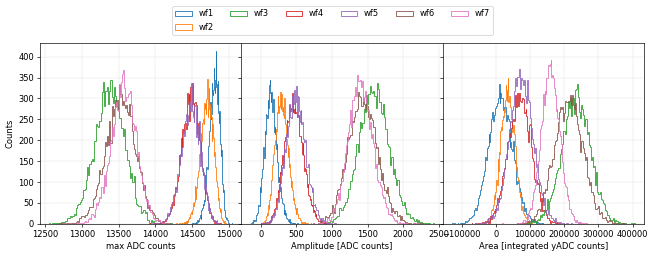

In [7]:
## Make plots
pylars.plotting.plot_LED_all_channels(df_processed)

The different ilumination of the tiles induces different expected signal sized for the same LED lumninosity (i.e., same LED pulse widht and same LED voltage). 

### Analyse all the LED datasets of a run

To easily process all the LED datasets of a given "LED callibration campaign" the ``LED_window`` analysis provides methods to find all the files, read their LED properties (pulse width and voltage) and batch precess them. The resulting (large) dataset has all the processed waveforms for the purpuse of studying LED light levels for each channel.

When the LED levels are defined, such a dataset is not required and the "mass" processing, although rather fast, should be revised.

In [8]:
LED_run = pylars.analysis.LED_window(led_data_path=run_path, 
                                     led_window=(105,155))

Finding LED data files:   0%|          | 0/17 [00:00<?, ?it/s]

Failed to get info for file /disk/gfs_atp/xenoscope/tpc/commissioning/pressure_studies/LED_levels/graphictest/graphictest_Module_0_0.root


In [9]:
LED_run.files_df.head()

,LEDwidth,LEDvoltage,module,path
0,50,6.5,0,/disk/gfs_atp/xenoscope/tpc/commissioning/pres...
1,50,7.0,0,/disk/gfs_atp/xenoscope/tpc/commissioning/pres...
2,50,7.5,0,/disk/gfs_atp/xenoscope/tpc/commissioning/pres...
3,50,8.0,0,/disk/gfs_atp/xenoscope/tpc/commissioning/pres...
4,100,2.5,0,/disk/gfs_atp/xenoscope/tpc/commissioning/pres...


In [10]:
led_processed = LED_run.process_all_datasets()
led_processed.head()    

Processing LED data:   0%|          | 0/16 [00:00<?, ?it/s]

,module,channel,wf_number,led_amplitude,led_area,led_ADCcounts,LEDwidth,LEDvoltage
0,0,wf1,0,81.0,-2720.0,14816,50,6.5
1,0,wf1,1,50.0,-47140.0,14797,50,6.5
2,0,wf1,2,261.5,69330.0,14713,50,6.5
3,0,wf1,3,157.0,30820.0,14709,50,6.5
4,0,wf1,4,95.0,-27950.0,14808,50,6.5


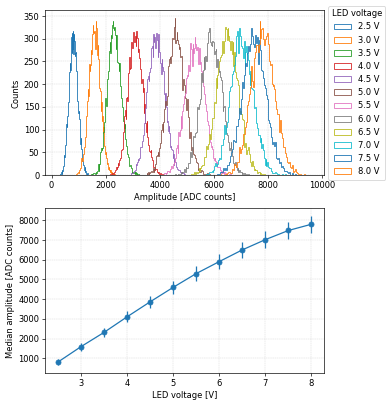

In [11]:
## Look for the histograms of a single channel for all the light levels

ch = 'wf3'
module = 0
width  = 100

pylars.plotting.plot_light_levels(led_processed_df=led_processed,
                                  channel=ch,
                                  module=module,
                                  led_width=width)


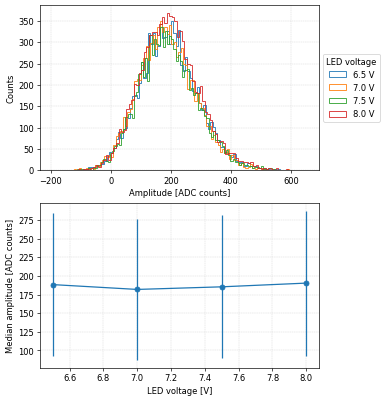

In [12]:
ch = 'wf3'
module = 0
width  = 50

pylars.plotting.plot_light_levels(led_processed_df=led_processed,
                                  channel=ch,
                                  module=module,
                                  led_width=width)